In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def basinFunction(vector):
    """
    The objective function.
    
    :param vector: a vector. In this case, it is a two dimensions vector.
    :return: value of objective function
    """
    a, h, k = 1, 0, 0
    total = 0
    for i in vector:
        y = a * pow(i - h, 2) + k
        total += y
    return total


def randomSearch(search_space, dim_number):
    """
    Randomly generate solutions. 
    
    :param search_space: the range of search space.
    :return sol: solution in a list. there are dim_numbder values in this list.
    """
    lower_bound, upper_bound = search_space[0], search_space[1]
    sol = []
    for i in range(dim_number):
        sol.append(lower_bound + (upper_bound - lower_bound) * random.random())
    return sol

In [65]:
search_space = [-5,5]
dim_number = 2
max_iteration = 10000

sol = {'best_solution': None,
      'best_objective_value': float('inf')}

sol_list = []
objective_value_list = []

while max_iteration > 0:
    max_iteration -= 1
    new_solution = randomSearch(search_space, dim_number)
    new_objective_value = basinFunction(new_solution)
    
    if new_objective_value < sol['best_objective_value']:
        sol['best_objective_value'] = new_objective_value # update the best objective value
        sol['best_solution'] = new_solution # update the best solution
        sol_list.append(new_solution) # add best solution to list for later plotting usage
        objective_value_list.append(new_objective_value) # add best value to list for later plotting usage
        
print('best solution:', sol['best_solution'], '\nbest objective value: ',sol['best_objective_value'])


best solution: [0.033320638217456455, -0.023692985955909407] 
best objective value:  0.0016716225147255402


X:  4.673969541345974 Y:  -1.4119461076621667 Z: 23.839583084372233
X:  -0.011676962396345303 Y:  1.1865009093616585 Z: 1.4079207593668484
X:  0.6131566006292406 Y:  0.6354662408426472 Z: 0.7797783601458914
X:  0.08960299121662807 Y:  0.3628192934756944 Z: 0.13966653575316917
X:  0.3013184842925565 Y:  0.06119362270509221 Z: 0.09453748843613678
X:  -0.08178548880396175 Y:  -0.057548983667513376 Z: 0.010000751700066673
X:  -0.017266975509006244 Y:  -0.08752299496645666 Z: 0.007958423091127018
X:  0.04953069109735786 Y:  0.06349778875009449 Z: 0.006485258536733511
X:  0.033320638217456455 Y:  -0.023692985955909407 Z: 0.0016716225147255402


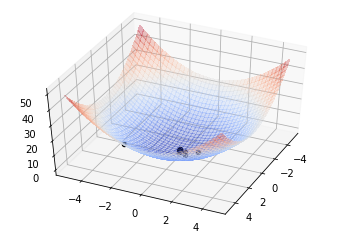

In [66]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(45, 25)

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = basinFunction([X,Y])

# Plot the surface.
ax.set_top_view()
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.3,
                       linewidth=0, antialiased=False)

for i in range(len(objective_value_list)):
    print('X: ',sol_list[i][0],'Y: ',sol_list[i][1], 'Z:',objective_value_list[i],)
    ax.scatter(sol_list[i][0],sol_list[i][1],objective_value_list[i], color='black')
